## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();

from ucimlrepo import fetch_ucirepo

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing.
Let's take a brief look to the dataset.

In [4]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [5]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
2969,43,blue-collar,married,secondary,no,1109,yes,no,NaN,14,may,160,2,-1,0,NaN
29348,34,unemployed,single,secondary,no,847,no,no,cellular,2,feb,684,2,-1,0,NaN
13704,39,blue-collar,married,secondary,no,1309,no,yes,telephone,10,jul,37,1,-1,0,NaN
32853,37,management,single,tertiary,no,146,yes,no,cellular,17,apr,135,1,336,3,failure
21004,55,retired,married,primary,no,3334,no,no,cellular,14,aug,632,4,-1,0,NaN


In [6]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [7]:
df.isna().sum().sum() #df.isna() creates a DataFrame of the same shape as your original DataFrame, with True where the values are NaN and False where they are not.

52124

In [8]:
df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [9]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
# for numerical columns (if any) fill with column mean value


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [11]:
len(categorical_columns)+len(numerical_columns)

16

In [12]:
len(df.columns)

16

In [13]:
df[categorical_columns] = df[categorical_columns].fillna('unknown')

<ipython-input-13-c4022a385328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_columns] = df[categorical_columns].fillna('unknown')


In [14]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [15]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

<ipython-input-15-06ac505b4dd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [16]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

Categorical: job, marital, education, contact, poutcome

Int: age, balance, duration, campaign, pdays, previous

Bin: default, housing, loan, y

Date: day_of_week, month

-----
## Q2
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [17]:
from os import cpu_count
count_yes = 0
count_no = 0
for i in range(len(y)):
    #print(y.loc[i])
    if list(y.loc[i])[0] == 'yes':
        count_yes += 1
    if list(y.loc[i])[0] == 'no':
        count_no += 1
count = count_yes + count_no + 0.0
print(count_yes/count)
print(count_no/count)

0.11698480458295547
0.8830151954170445


In [18]:
print(count_yes+count_no)

45211


In [19]:
print(len(y))

45211


-----
## Q3
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [20]:
df['y'] = y
def y_trans(x):
    if x == 'no':
        return 0
    if x == 'yes':
        return 1

df['y'] = df['y'].apply(y_trans)

In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [22]:
gp1 = df.groupby(['marital'])['y'].count()
gp2 = df.groupby(['marital'])['y'].sum()
#df['y_by_marital'] = df['marital'].map(gp)

In [23]:
gp1

marital
divorced     5207
married     27214
single      12790
Name: y, dtype: int64

In [24]:
gp2

marital
divorced     622
married     2755
single      1912
Name: y, dtype: int64

In [25]:
print("divorced: ", 622./5207)
print("married: ", 2755./27214)
print("single: ", 1912./12790)

divorced:  0.11945458037257538
married:  0.10123465863158668
single:  0.1494917904612979


In [26]:
#3.4 List top 3 most successful job categories in alphabetical order
gp1 = df.groupby(['job'])['y'].count()
gp2= df.groupby(['job'])['y'].sum()
df['y_by_job1'] = df['job'].map(gp1)
df['y_by_job2'] = df['job'].map(gp2)
df['y_by_job_success'] = df['y_by_job2'] /df['y_by_job1']

In [27]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,y_by_job1,y_by_job2,y_by_job_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,9458,1301,0.137556
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,7597,840,0.110570
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,1487,123,0.082717
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,9732,708,0.072750
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,288,34,0.118056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,7597,840,0.110570
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,2264,516,0.227915
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,2264,516,0.227915
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,9732,708,0.072750


In [28]:
set(df.job)

{'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown'}

In [29]:
a = list(set(df.y_by_job_success))
a.sort()
print(a)

[0.07274969173859433, 0.08271687962340282, 0.08790322580645162, 0.08883004333172845, 0.11056996182703699, 0.11805555555555555, 0.11842938568714376, 0.12202668729452718, 0.13755550856417847, 0.15502686108979277, 0.22791519434628976, 0.2867803837953092]


In [30]:
from datetime import datetime
cond1 = df["y_by_job_success"] == a[-1]
cond2 = df["y_by_job_success"] == a[-2]
cond3 = df["y_by_job_success"] == a[-3]
df[cond1].job.head()


151    student
203    student
265    student
292    student
297    student
Name: job, dtype: object

In [31]:
df[cond2].job.head()


8     retired
15    retired
18    retired
24    retired
43    retired
Name: job, dtype: object

In [32]:
df[cond3].job.head()

134    unemployed
142    unemployed
147    unemployed
176    unemployed
217    unemployed
Name: job, dtype: object

In [33]:
#3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form marital,job (eg. married,entrepreneur)
grouped = df.groupby(['marital', 'job'])
result = grouped['y'].count()
result2 = grouped['y'].sum()

In [34]:
result

marital   job          
divorced  admin.            750
          blue-collar       750
          entrepreneur      179
          housemaid         184
          management       1111
          retired           425
          self-employed     140
          services          549
          student             6
          technician        925
          unemployed        171
          unknown            17
married   admin.           2693
          blue-collar      6968
          entrepreneur     1070
          housemaid         912
          management       5400
          retired          1731
          self-employed     993
          services         2407
          student            54
          technician       4052
          unemployed        731
          unknown           203
single    admin.           1728
          blue-collar      2014
          entrepreneur      238
          housemaid         144
          management       2947
          retired           108
          self-e

In [35]:
result2

marital   job          
divorced  admin.            90
          blue-collar       58
          entrepreneur      15
          housemaid         18
          management       142
          retired          121
          self-employed     22
          services          50
          student            1
          technician        77
          unemployed        27
          unknown            1
married   admin.           306
          blue-collar      437
          entrepreneur      81
          housemaid         67
          management       681
          retired          382
          self-employed     79
          services         178
          student           10
          technician       416
          unemployed        97
          unknown           21
single    admin.           235
          blue-collar      213
          entrepreneur      27
          housemaid         24
          management       478
          retired           13
          self-employed     86
          servi

In [36]:
result2/result

marital   job          
divorced  admin.           0.120000
          blue-collar      0.077333
          entrepreneur     0.083799
          housemaid        0.097826
          management       0.127813
          retired          0.284706
          self-employed    0.157143
          services         0.091075
          student          0.166667
          technician       0.083243
          unemployed       0.157895
          unknown          0.058824
married   admin.           0.113628
          blue-collar      0.062715
          entrepreneur     0.075701
          housemaid        0.073465
          management       0.126111
          retired          0.220682
          self-employed    0.079557
          services         0.073951
          student          0.185185
          technician       0.102665
          unemployed       0.132695
          unknown          0.103448
single    admin.           0.135995
          blue-collar      0.105760
          entrepreneur     0.113445
    

-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [37]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,y_by_job1,y_by_job2,y_by_job_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,9458,1301,0.137556
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,7597,840,0.110570
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,1487,123,0.082717
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,9732,708,0.072750
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,288,34,0.118056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,7597,840,0.110570
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,2264,516,0.227915
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,2264,516,0.227915
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,9732,708,0.072750


In [38]:
#df.drop('y_by_job', axis=1, inplace=True)
df.drop('y_by_job1', axis=1, inplace=True)
df.drop('y_by_job2', axis=1, inplace=True)
df.drop('y_by_job_success', axis=1, inplace=True)


In [39]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [40]:
df.drop('y', axis=1, inplace=True)
#df.drop('y_by_marital', axis=1, inplace=True)
#df.drop('y_by_job', axis=1, inplace=True)

In [41]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [42]:
# TODO map y (target) values to 0 / 1
def y_trans(x):
    if x == 'no':
        return 0
    if x == 'yes':
        return 1

y['y'] = y['y'].apply(y_trans)

<ipython-input-42-ba2d24d6a136>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].apply(y_trans)


In [43]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [44]:
# TODO map binary columns' values to 0 / 1

#Bin: default, housing, loan
def y_trans(x):
    if x == 'no':
        return 0
    if x == 'yes':
        return 1

df['default'] = df['default'].apply(y_trans)
df['housing'] = df['housing'].apply(y_trans)
df['loan'] = df['loan'].apply(y_trans)

In [45]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown


4.1 Who accepts more deposits (on average): people with housing loans (housing) or people with personal loans (loan)? The answer is the acceptance rate of the chosen (most successful) category.

In [46]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [47]:
set(df.loan)

{0, 1}

In [48]:
df['y'] = y

In [49]:
grouped = df.groupby(['loan'])
result = grouped['y'].count()

In [50]:
result2 = grouped['y'].sum()

In [51]:
result2

loan
0    4805
1     484
Name: y, dtype: int64

In [52]:
result

loan
0    37967
1     7244
Name: y, dtype: int64

In [53]:
print("acceptance rate_loan:",484 / 7244)

acceptance rate_loan: 0.06681391496410823


In [54]:
# 7244.0 / (7244 + Loan(1)|но кредит не дали)

In [55]:
grouped = df.groupby(['housing'])
result = grouped['y'].count()

In [56]:
result

housing
0    20081
1    25130
Name: y, dtype: int64

In [57]:
result2 = grouped['y'].sum()

In [58]:
result2

housing
0    3354
1    1935
Name: y, dtype: int64

In [59]:
print("acceptance rate_loan:",1935/25130)

acceptance rate_loan: 0.07699960206923995


4.2 What is the min, max, average and std values of age among people who have housing loans (housing)? The answer shold be given in descending order

In [60]:
# from datetime import datetime
# cond1 = df["y_by_job"] == 9732
# cond2 = df["y_by_job"] == 9458
# cond3 = df["y_by_job"] == 7597
# df[cond1].job.head()

# df['default'] = df['default'].apply(y_trans)
# df['housing'] = df['housing'].apply(y_trans)
# df['loan'] = df['loan'].apply(y_trans)

cond1 = df["housing"] == 1
print(df[cond1].age.min())
print(df[cond1].age.max())
print(df[cond1].age.mean())
print(df[cond1].age.std())

20
78
39.175288499801034
8.926807082119515


-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

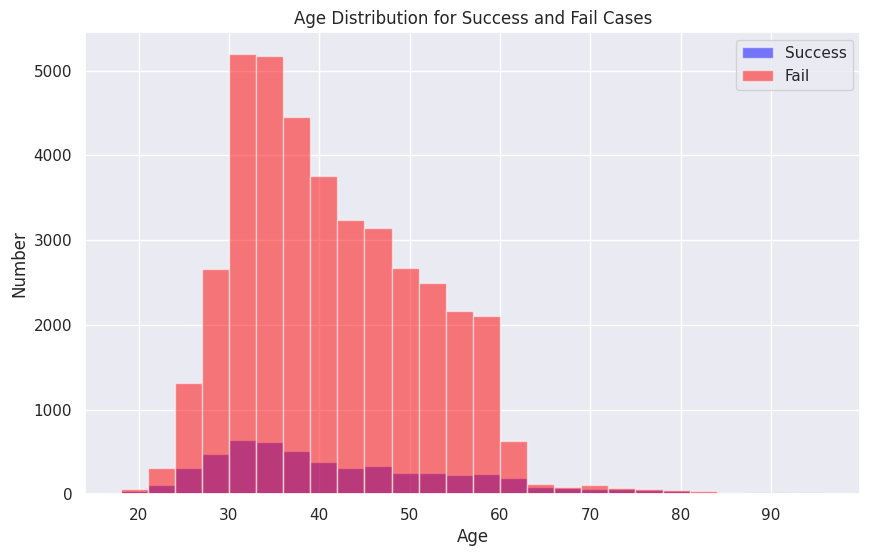

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
success_data = df[df['y'] == 1]
fail_data = df[df['y'] == 0]
min_value = min(success_data['age'].min(), fail_data['age'].min())
max_value = max(success_data['age'].max(), fail_data['age'].max())
bin_width = 3  # Set the desired bin width
bins = np.arange(min_value, max_value + bin_width, bin_width)
plt.figure(figsize=(10, 6))
success_age = plt.hist(success_data['age'], bins, alpha=0.5, label='Success', color='blue')
fail_age = plt.hist(fail_data['age'], bins, alpha=0.5, label='Fail', color='red')

plt.xlabel('Age')
plt.ylabel('Number')
plt.legend()
plt.title('Age Distribution for Success and Fail Cases')
plt.show()

Let's build a histogram of success by age, which will take into account the number of respondents of different age categories

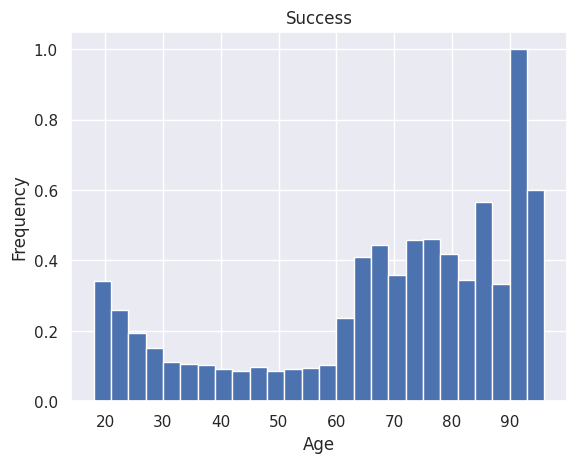

In [62]:
ratio = np.array(success_age[0])/ np.array((success_age[0]+fail_age[0]))
bin_widths = np.diff(fail_age[1])
# Create the histogram from frequencies
plt.bar(fail_age[1][:-1], ratio, width=bin_widths, align='edge')
# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Success')
# Display the plot
plt.show()

It can be seen that success increases as age increases. However, the first histogram shows that the number of older respondents is very small. Therefore, such a conclusion cannot be drawn. It is also clear that the success of middle-aged people (the most numerous category - this can be seen from the first histogram) is constant.

Answer: A

## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

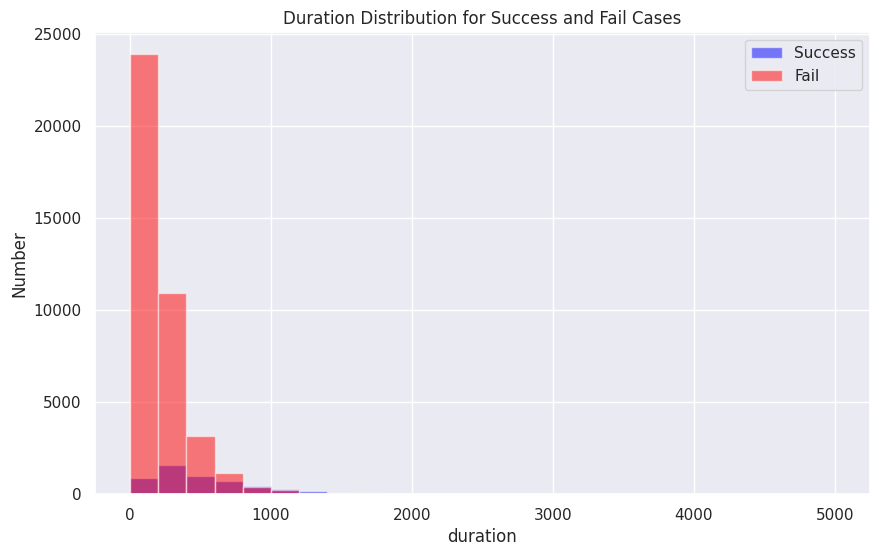

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
success_data = df[df['y'] == 1]
fail_data = df[df['y'] == 0]
min_value = min(success_data['duration'].min(), fail_data['duration'].min())
max_value = max(success_data['duration'].max(), fail_data['duration'].max())
bin_width = 200  # Set the desired bin width
bins = np.arange(min_value, max_value + bin_width, bin_width)
plt.figure(figsize=(10, 6))
success_dur = plt.hist(success_data['duration'], bins, alpha=0.5, label='Success', color='blue')
fail_dur = plt.hist(fail_data['duration'], bins, alpha=0.5, label='Fail', color='red')

plt.xlabel('duration')
plt.ylabel('Number')
plt.legend()
plt.title('Duration Distribution for Success and Fail Cases')
plt.show()

<ipython-input-64-1167115e0f5b>:1: RuntimeWarning: invalid value encountered in divide
  ratio = np.array(success_dur[0])/ np.array((success_dur[0]+fail_dur[0]))


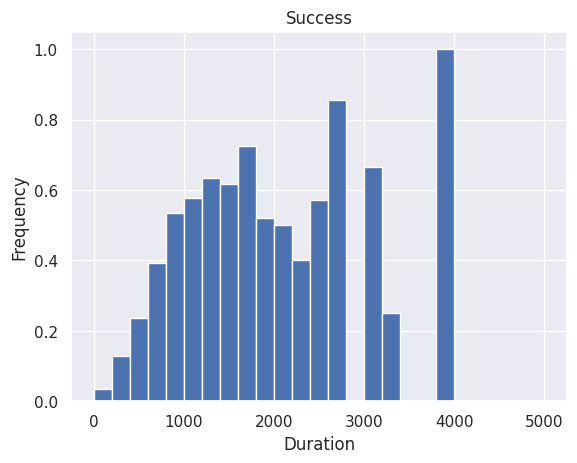

In [64]:
ratio = np.array(success_dur[0])/ np.array((success_dur[0]+fail_dur[0]))
bin_widths = np.diff(fail_dur[1])
# Create the histogram from frequencies
plt.bar(fail_dur[1][:-1], ratio, width=bin_widths, align='edge')
# Add labels and a title
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Success')
# Display the plot
plt.show()

As can be seen from the second histogram: the greater the duration, the greater the success

Answer: B

-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

Categorical: job, marital, education, contact, poutcome

Int: age, balance, duration, campaign, pdays, previous

Bin: default, housing, loan, y

Date: day_of_week, month

In [65]:
# TODO define numerical columns


In [66]:
set(df.month)

{'apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep'}

In [67]:
def month(x):
    if x == 'jan':
        return 1
    if x == 'feb':
        return 2
    if x == 'mar':
        return 3
    if x == 'apr':
        return 4
    if x == 'may':
        return 5
    if x == 'jun':
        return 6
    if x == 'jul':
        return 7
    if x == 'aug':
        return 8
    if x == 'sep':
        return 9
    if x == 'oct':
        return 10
    if x == 'nov':
        return 11
    if x == 'dec':
        return 12

df['month_new'] =  df['month'].apply(month)
df.drop('month', axis=1, inplace=True)

In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,y,month_new
0,58,management,married,tertiary,0,2143,1,0,unknown,5,261,1,-1,0,unknown,0,5
1,44,technician,single,secondary,0,29,1,0,unknown,5,151,1,-1,0,unknown,0,5
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,76,1,-1,0,unknown,0,5
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,92,1,-1,0,unknown,0,5
4,33,unknown,single,unknown,0,1,0,0,unknown,5,198,1,-1,0,unknown,0,5


In [69]:
numerical_columns = df.select_dtypes(include=['number']).columns

In [70]:
numerical_columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'month_new'],
      dtype='object')

In [71]:
set(df.month_new)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [72]:
only_numerical_columns = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

There are 7 numerical features

-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [73]:
correlation = df['age'].corr(df['y'])

In [74]:
only_numerical_columns

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

In [75]:
correlation

0.02515501708838084

In [76]:
for i in only_numerical_columns:
    correlation = df[i].corr(df['y'])
    print(i, correlation)

age 0.02515501708838084
balance 0.05283841028818294
day_of_week -0.02834777672093108
duration 0.39452101589456207
campaign -0.07317200634586699
pdays 0.10362149401628734
previous 0.09323577278887688


-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

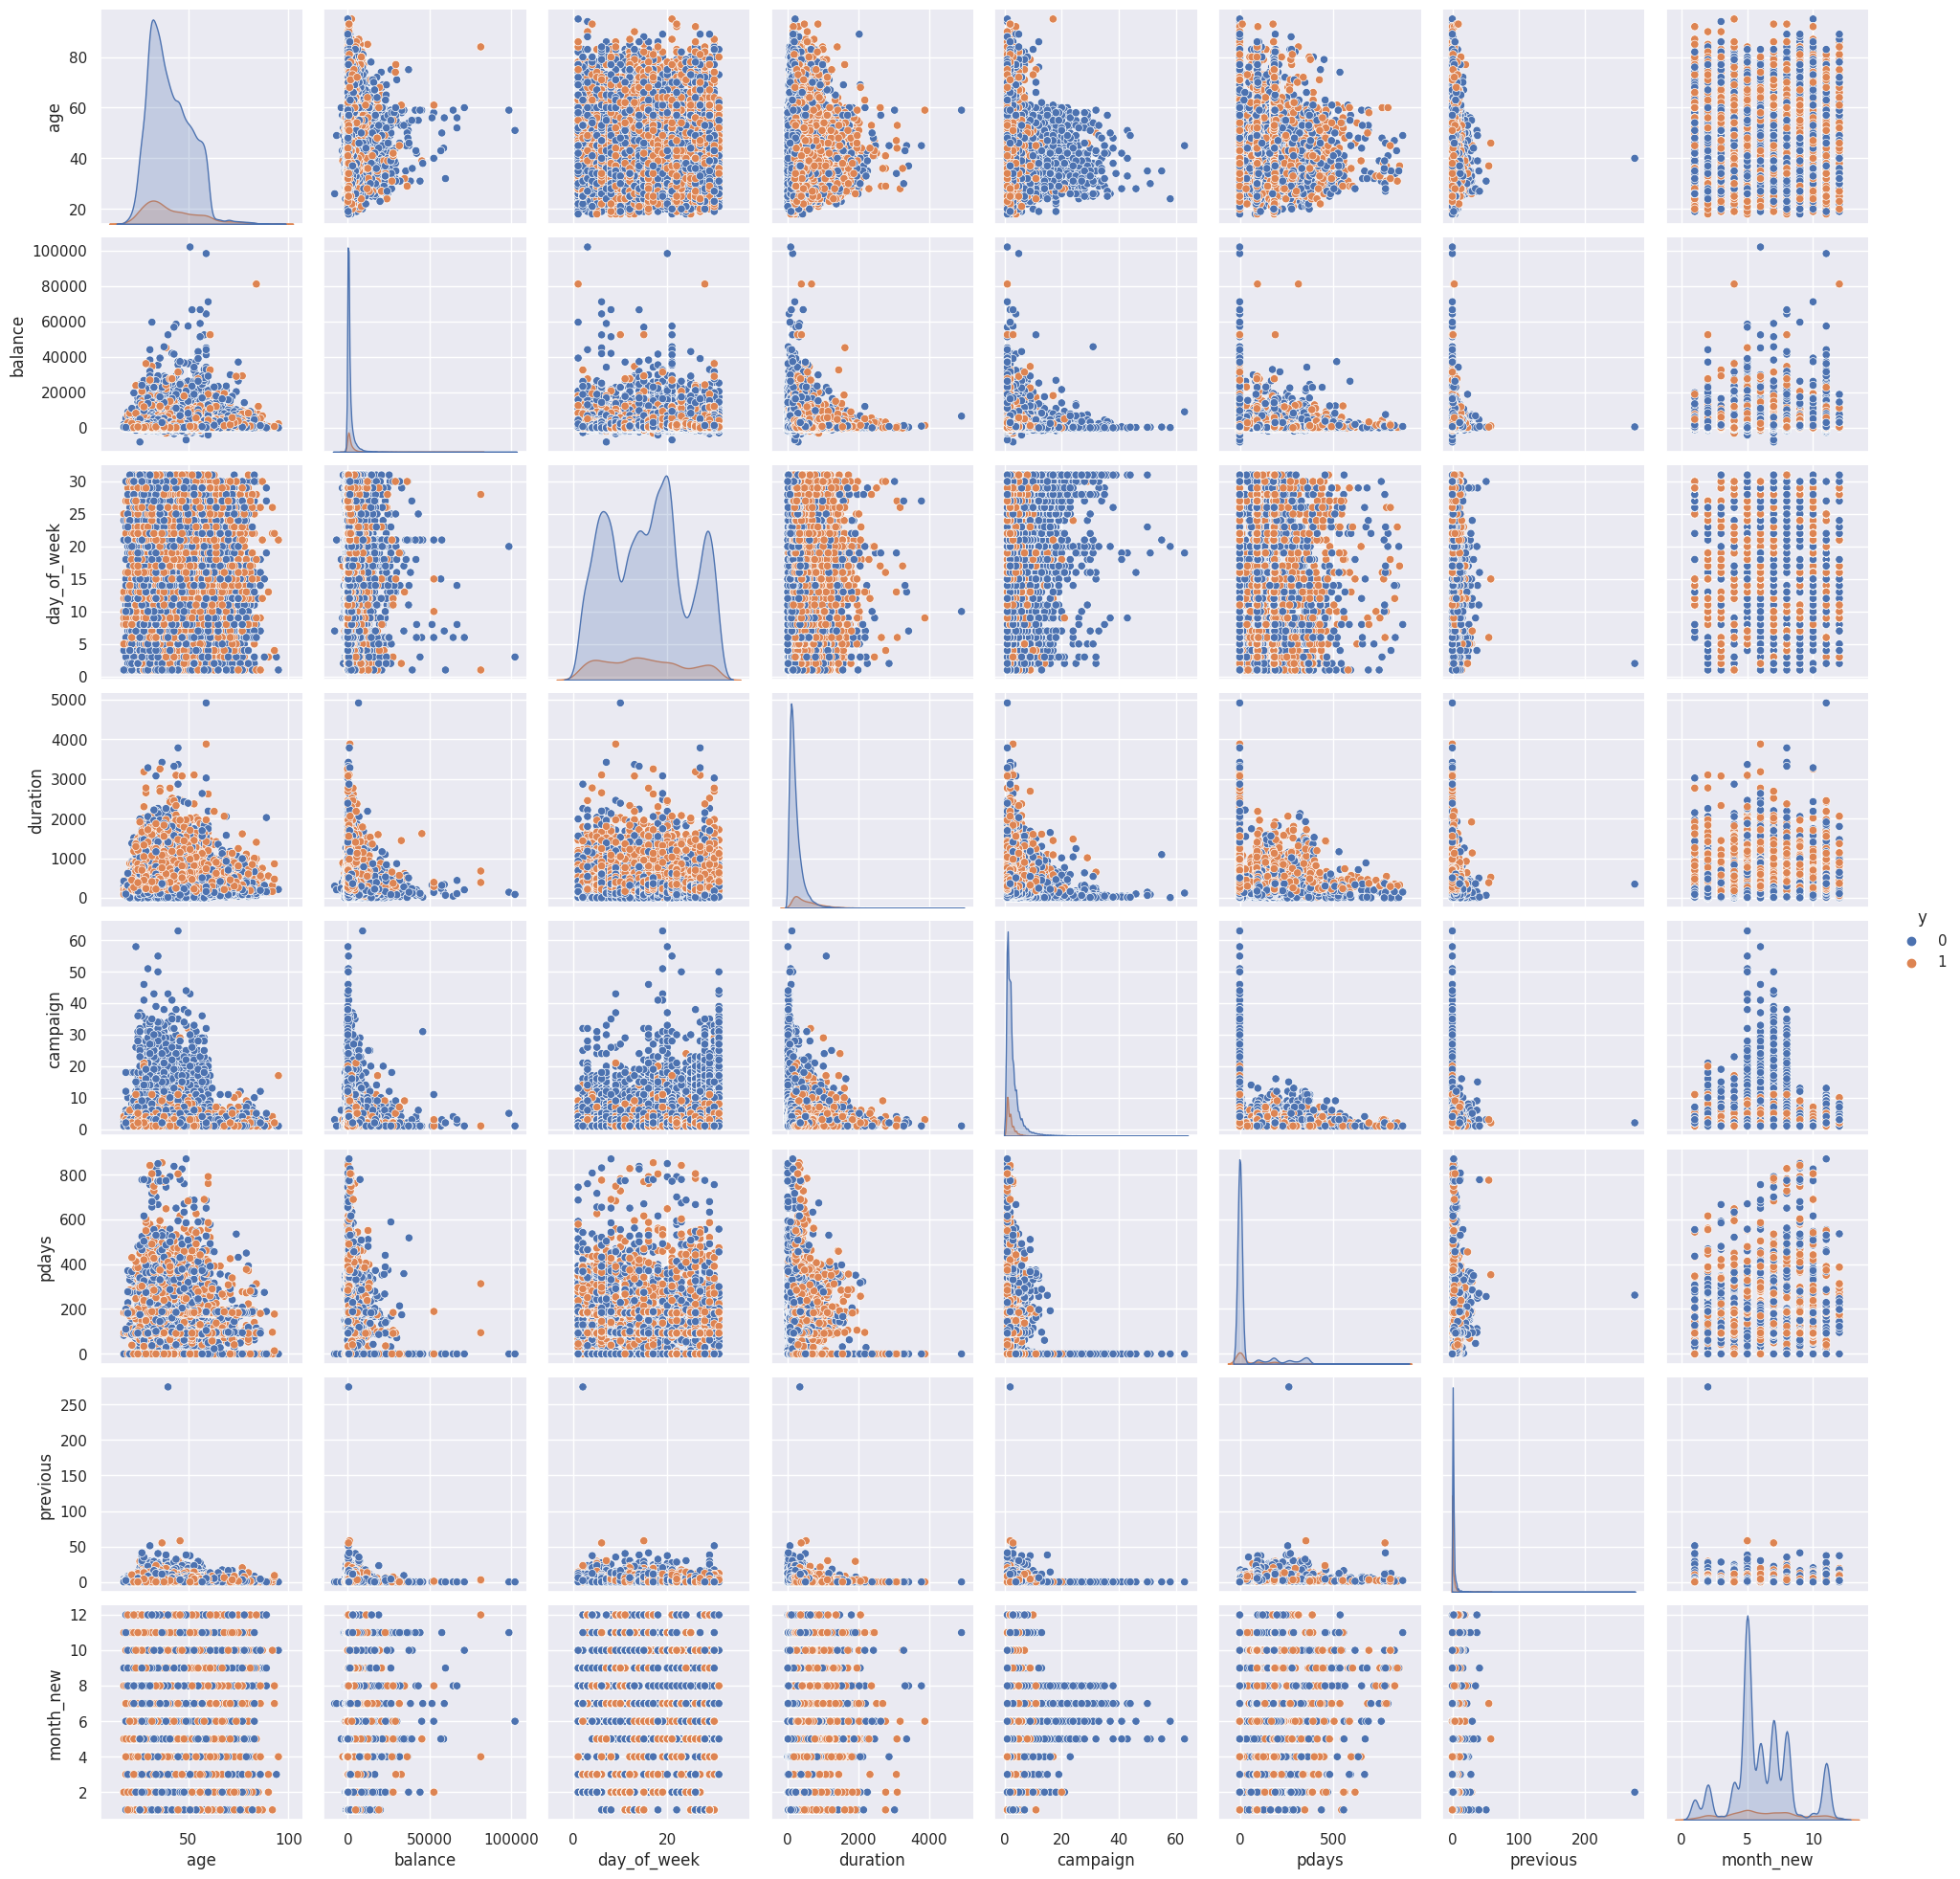

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df' with 'column1', 'column2', and a 'success' column
sns.pairplot(df, hue='y', vars=only_numerical_columns )
plt.show()

It can be seen that in the axes campaign and age
the sample is well divided into 2 classes.
The data is also separable in the campaign and day
of the week axes.

## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [77]:

def contacted(x):
    if x == -1:
        return 0
    else:
        return 1

df['was_contacted'] =  df['pdays'].apply(contacted)
#df.drop('month', axis=1, inplace=True)

In [78]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,y,month_new,was_contacted
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,977,3,-1,0,unknown,1,11,0
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,456,2,-1,0,unknown,1,11,0
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,1127,5,184,3,success,1,11,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,508,4,-1,0,unknown,0,11,0
45210,37,entrepreneur,married,secondary,0,2971,0,0,cellular,17,361,2,188,11,other,0,11,1


In [79]:
c = 0
for i in list(df.was_contacted):
    if i == 0:
        c+=1
print(c)

36954


------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [80]:
df.drop('y', axis=1, inplace=True)

In [81]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'month_new', 'was_contacted'],
      dtype='object')

In [82]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,month_new,was_contacted
0,58,management,married,tertiary,0,2143,1,0,unknown,5,261,1,-1,0,unknown,5,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,151,1,-1,0,unknown,5,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,76,1,-1,0,unknown,5,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,92,1,-1,0,unknown,5,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,198,1,-1,0,unknown,5,0


-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame.

#### How many resulting columns in a DataFrame do you have after this operation?

Categorical: job, marital, education, contact, poutcome

Int: age, balance, duration, campaign, pdays, previous

Bin: default, housing, loan, y

Date: day_of_week, month

In [83]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'month_new', 'was_contacted'],
      dtype='object')

In [84]:
only_numerical_columns = ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
only_categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome', 'month_new']
only_binary_columns = ['default', 'housing', 'loan', 'was_contacted']

In [85]:
len(only_numerical_columns) + len(only_categorical_columns)+ len(only_binary_columns)

17

In [86]:
len(df.columns)

17

In [87]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,poutcome,month_new,was_contacted
0,58,management,married,tertiary,0,2143,1,0,unknown,5,261,1,-1,0,unknown,5,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,151,1,-1,0,unknown,5,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,76,1,-1,0,unknown,5,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,92,1,-1,0,unknown,5,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,198,1,-1,0,unknown,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,977,3,-1,0,unknown,11,0
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,456,2,-1,0,unknown,11,0
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,1127,5,184,3,success,11,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,508,4,-1,0,unknown,11,0


In [88]:
# TODO add one-hot labels and drop columns
df = pd.get_dummies(df, columns=only_categorical_columns, drop_first=True)


In [89]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'was_contacted',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_new_2', 'month_new_3', 'month_new_4',
       'month_new_5', 'month_new_6', 'month_new_7', 'month_new_8',
       'month_new_9', 'month_new_10', 'month_new_11', 'month_new_12'],
      dtype='object')

In [90]:
df.shape

(45211, 43)

## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# X = df

X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
y_train.sum()

y    4198
dtype: int64

## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [93]:
only_numerical_columns

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

In [94]:
# scaler = StandardScaler()
# X_train[only_numerical_columns] = scaler.fit_transform(X_train[only_numerical_columns])
# X_test[only_numerical_columns] = scaler.fit_transform(X_test[only_numerical_columns])

In [95]:
scaler = StandardScaler()
X_train[only_numerical_columns] = scaler.fit_transform(X_train[only_numerical_columns])
X_test[only_numerical_columns] = scaler.transform(X_test[only_numerical_columns])
a = list(X_train.duration)
a.sort()
print((a[int(len(a)/2)]+ a[int(len(a)/2+1)])/2)

-0.29932667738892427


In [96]:
X_train.tail()

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_new_3,month_new_4,month_new_5,month_new_6,month_new_7,month_new_8,month_new_9,month_new_10,month_new_11,month_new_12
11284,0.289048,0,-0.099915,0,0,0.262110,7.147714,-0.565886,-0.411364,-0.244772,...,0,0,0,1,0,0,0,0,0,0
44732,-1.688684,0,-0.282181,0,0,-0.938984,-0.182541,-0.565886,0.517649,0.177056,...,0,0,0,0,0,0,1,0,0,0
38158,-0.652729,0,-0.014570,1,0,-0.098218,-0.069648,-0.565886,-0.411364,-0.244772,...,0,0,1,0,0,0,0,0,0,0
860,-0.746907,0,-0.395643,0,0,-1.059093,-0.567934,-0.565886,-0.411364,-0.244772,...,0,0,1,0,0,0,0,0,0,0
15795,-0.276018,0,-0.463787,1,0,0.622438,-0.735327,2.318591,-0.411364,-0.244772,...,0,0,0,0,1,0,0,0,0,0


## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [97]:
X_train.shape

(36168, 43)

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Perform feature selection with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=3)

X_new = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]
print("Top 3 features by ANOVA F-test:")
for feature in selected_feature_names:
    print(feature)

Top 3 features by ANOVA F-test:
duration
was_contacted
poutcome_success


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'C': np.logspace(-2, 4, 7)
    }
reg = LogisticRegression(penalty='l2', max_iter=400, random_state=42)
grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=400, random_state=42),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])})

In [100]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")


Best Parameters: {'C': 10.0}
Accuracy: 0.8987


In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

In [102]:
probas = best_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = roc_auc_score(y_test, probas[:, 1])

In [103]:
print(roc_auc)

0.9045547344562332


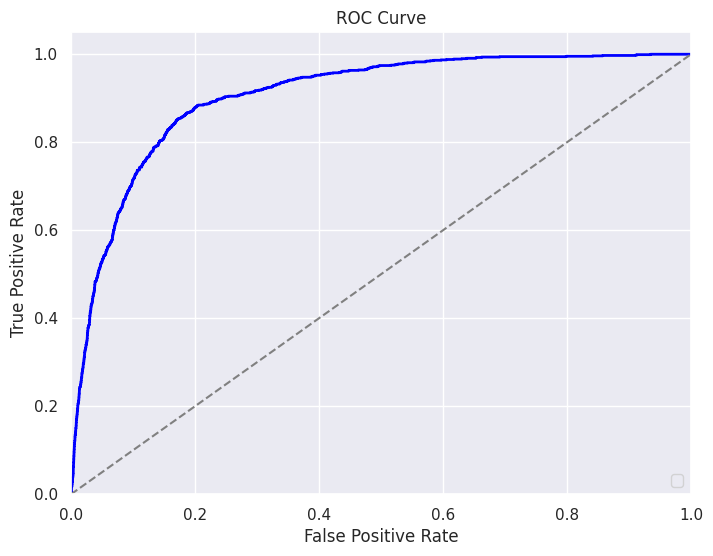

In [104]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



In [105]:
a = best_model.coef_[0]
for i in range(len(a)):
    a[i] = abs(a[i])
b = sorted(a)[-3:]
print("max weights: ", b)
print("features with max weights: ")
names = X_train.columns
res = list()
for i in range(len(b)):
    for j in range(len(a)):
        if a[j] == b[i]:
            print(j, "index:", names[j])
            res.append(names[j])

max weights:  [2.1428063214011965, 2.2465432959603113, 2.811121362972397]
features with max weights: 
39 index: month_new_9
30 index: poutcome_success
33 index: month_new_3


------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tqdm.notebook import tqdm

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [108]:
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],  # Number of trees in the forest
    'max_depth': range(2, 16),  # Maximum depth of the trees
   }
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Parameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.90


In [109]:
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.9039


In [110]:
probas = best_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = roc_auc_score(y_test, probas[:, 1])

In [111]:
print(roc_auc)

0.9275217067759444


PR-curve

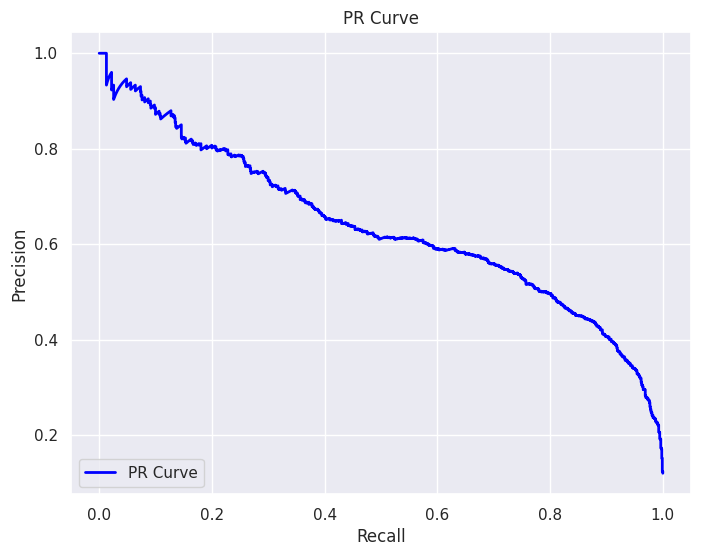

In [112]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, probas[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc='lower left')
plt.show()

Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?

Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?

Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?

Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?

In [113]:
#17.3
ind_recall_more0_5=list()
for i in range(len(recall)):
    if recall[i]>0.5:
        ind_recall_more0_5.append(i)
arr=list()
for ind in ind_recall_more0_5:
    arr.append(precision[ind])
arr.sort()
print(arr[-1])


0.6154696132596685


In [114]:
#17.4
ind_precision_more0_5=list()
for i in range(len(precision)):
    if precision[i]>0.5:
        ind_precision_more0_5.append(i)
arr=list()
for ind in ind_precision_more0_5:
    arr.append(recall[ind])
arr.sort()
print(arr[-1])




0.7937671860678277


In [115]:
# 17.6
for i in range(len(thresholds)):
    if ((thresholds[i] + thresholds[i+1]) / 2. > 0.3):
        print("index:",i)
        print((thresholds[i] + thresholds[i+1]) / 2.)
        break
print("recall", recall[i])

index: 7689
0.30039548088092183
recall 0.692942254812099


In [116]:
top30 = list()
feature_importances = best_model.feature_importances_
feature_names =  X_train.columns
feature_importance_pairs = list(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
top_three_features = sorted_feature_importance[:30]
for feature, importance in top_three_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")
    top30.append(feature)

Feature: duration, Importance: 0.3223
Feature: poutcome_success, Importance: 0.0850
Feature: age, Importance: 0.0766
Feature: balance, Importance: 0.0650
Feature: day_of_week, Importance: 0.0604
Feature: pdays, Importance: 0.0506
Feature: housing, Importance: 0.0301
Feature: campaign, Importance: 0.0277
Feature: previous, Importance: 0.0259
Feature: month_new_3, Importance: 0.0186
Feature: contact_unknown, Importance: 0.0177
Feature: month_new_10, Importance: 0.0155
Feature: month_new_4, Importance: 0.0143
Feature: month_new_9, Importance: 0.0109
Feature: month_new_6, Importance: 0.0104
Feature: marital_married, Importance: 0.0102
Feature: education_secondary, Importance: 0.0097
Feature: month_new_5, Importance: 0.0090
Feature: education_tertiary, Importance: 0.0087
Feature: loan, Importance: 0.0086
Feature: marital_single, Importance: 0.0086
Feature: month_new_8, Importance: 0.0084
Feature: was_contacted, Importance: 0.0080
Feature: job_management, Importance: 0.0076
Feature: month_ne

In [117]:
top30

['duration',
 'poutcome_success',
 'age',
 'balance',
 'day_of_week',
 'pdays',
 'housing',
 'campaign',
 'previous',
 'month_new_3',
 'contact_unknown',
 'month_new_10',
 'month_new_4',
 'month_new_9',
 'month_new_6',
 'marital_married',
 'education_secondary',
 'month_new_5',
 'education_tertiary',
 'loan',
 'marital_single',
 'month_new_8',
 'was_contacted',
 'job_management',
 'month_new_7',
 'job_technician',
 'poutcome_unknown',
 'job_blue-collar',
 'month_new_11',
 'contact_telephone']

-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search.
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [118]:
len(df.columns)

43

In [119]:
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],  # Number of trees in the forest
    'max_depth': range(2, 16),  # Maximum depth of the trees
   }

X_train_30 = X_train[top30]
X_test_30 = X_test[top30]
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_30, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_30)
accuracy = accuracy_score(y_test, y_pred)


print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Parameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.9037


In [120]:
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
probas = best_model.predict_proba(X_test_30)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = roc_auc_score(y_test, probas[:, 1])
print("roc_auc:", roc_auc )

Best Parameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.9037
roc_auc: 0.9260859612302597


In [121]:
from sklearn.metrics import f1_score
print("Train f1:", f1_score(y_train, best_model.predict(X_train_30)))
print("Test f1:", f1_score(y_test, best_model.predict(X_test_30)))

Train f1: 0.8147424263576714
Test f1: 0.4909409701928697


18.3. As can be seen from the accuracy and roc-auc, feature selection did not significantly improve the model

In [122]:
X_train_30.columns

Index(['duration', 'poutcome_success', 'age', 'balance', 'day_of_week',
       'pdays', 'housing', 'campaign', 'previous', 'month_new_3',
       'contact_unknown', 'month_new_10', 'month_new_4', 'month_new_9',
       'month_new_6', 'marital_married', 'education_secondary', 'month_new_5',
       'education_tertiary', 'loan', 'marital_single', 'month_new_8',
       'was_contacted', 'job_management', 'month_new_7', 'job_technician',
       'poutcome_unknown', 'job_blue-collar', 'month_new_11',
       'contact_telephone'],
      dtype='object')

In [123]:
len(a)

43

In [124]:
#top3 features

feature_importances = best_model.feature_importances_
feature_names =  X_train.columns
feature_importance_pairs = list(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
top_three_features = sorted_feature_importance[:3]
for feature, importance in top_three_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature: age, Importance: 0.3312
Feature: default, Importance: 0.0866
Feature: balance, Importance: 0.0861


------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

Top 3 features:

LogisticRegression: month_new_9, poutcome_success, month_new_3

Random forest:age, duration, poutcome_success

Random forest top 30 features: age, default, balance

It can be seen that all three methods have either age or poutcome_success in the top 3 features. An interesting fact is that the top 3 features of logistic regression include the months September and March. To me, this is strange.

The presence of age and balance in top features is very logical to me, because a large balance shows the client’s reliability, while a small balance, on the contrary, shows his unreliability. The client’s age also plays a big role, because a middle-aged person can most easily repay a loan. Clients who are too young and too old no longer have a constant and sufficient source of income.


## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features.
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

**More features**

In [145]:
df_new = bank_marketing.data.features

In [146]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'was_contacted',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'month_new_2', 'month_new_3', 'month_new_4',
       'month_new_5', 'month_new_6', 'month_new_7', 'month_new_8',
       'month_new_9', 'month_new_10', 'month_new_11', 'month_new_12', 'season',
       'age_group'],
      dtype='object')

In [147]:
df['month'] = df_new['month_new']

In [148]:
df.tail()

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_new_6,month_new_7,month_new_8,month_new_9,month_new_10,month_new_11,month_new_12,season,age_group,month
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,1,0,4,2,11
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,1,0,4,3,11
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,1,0,4,3,11
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,1,0,4,2,11
45210,37,0,2971,0,0,17,361,2,188,11,...,0,0,0,0,0,1,0,4,2,11


In [149]:
set(df.month)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [139]:
#first feature - season

def season(x):
    if x < 3 :
        return 1
    if (x>2 and x<6):
        return 2
    if (x>5 and x<9):
        return 3
    if (x>8 and x<12):
        return 4
    if (x == 12):
        return 1
    return "Error"

df['season'] = df['month'].apply(season)

In [154]:
df.drop('month', axis=1, inplace=True)

In [155]:
df.shape

(45211, 45)

In [144]:
#second feature - age_group
def age_group(x):
    if x < 36 : # young
        return 1
    if (x>35 and x<61): # middle
        return 2
    if (x>60): # elderly
        return 3


df['age_group'] = df['age'].apply(age_group)

In [157]:
df.head()

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_new_5,month_new_6,month_new_7,month_new_8,month_new_9,month_new_10,month_new_11,month_new_12,season,age_group
0,58,0,2143,1,0,5,261,1,-1,0,...,1,0,0,0,0,0,0,0,2,2
1,44,0,29,1,0,5,151,1,-1,0,...,1,0,0,0,0,0,0,0,2,2
2,33,0,2,1,1,5,76,1,-1,0,...,1,0,0,0,0,0,0,0,2,1
3,47,0,1506,1,0,5,92,1,-1,0,...,1,0,0,0,0,0,0,0,2,2
4,33,0,1,0,0,5,198,1,-1,0,...,1,0,0,0,0,0,0,0,2,1


In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# X = df

X = df.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[only_numerical_columns] = scaler.fit_transform(X_train[only_numerical_columns])
X_test[only_numerical_columns] = scaler.transform(X_test[only_numerical_columns])

In [159]:
X_train.shape

(36168, 45)

GradBoosting

In [160]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [161]:
param_grid = {
    'n_estimators': [50,100,150, 200,250, 300],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2,0.5,1,10]
    # Add other hyperparameters and their respective values
}
clf = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [162]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [163]:
grid_search.best_score_

0.9096438844464636